In [19]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.2f' %x)

In [2]:
data = pd.read_csv('dataset/kc_house_data.csv')

In [3]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.00,3,2.50,1530,1131,3.00,0,0,...,8,1530,0,2009,0,98103,47.70,-122.35,1530,1509
21609,6600060120,20150223T000000,400000.00,4,2.50,2310,5813,2.00,0,0,...,8,2310,0,2014,0,98146,47.51,-122.36,1830,7200
21610,1523300141,20140623T000000,402101.00,2,0.75,1020,1350,2.00,0,0,...,7,1020,0,2009,0,98144,47.59,-122.30,1020,2007
21611,291310100,20150116T000000,400000.00,3,2.50,1600,2388,2.00,0,0,...,8,1600,0,2004,0,98027,47.53,-122.07,1410,1287


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# Novas perguntas do CEO para você


## 1 - Qual o número de imóvel por ano de construção?


In [5]:
data[['id','yr_built']].groupby('yr_built').count()

,id
yr_built,
1900,87
1901,29
1902,27
1903,46
1904,45
...,...
2011,130
2012,170
2013,201


In [6]:
data.groupby('yr_built')['id'].count().reset_index()

,yr_built,id
0,1900,87
1,1901,29
2,1902,27
3,1903,46
4,1904,45
...,...,...
111,2011,130
112,2012,170
113,2013,201
114,2014,559


## 2 - Qual o menor número de quartos por ano de construção de imóveis?

In [7]:
#data.groupby('yr_built')['bedrooms'].min()
data[['yr_built','bedrooms']].groupby('yr_built').agg(['min','max'])

bedrooms    
              min max
yr_built             
1900            1   6
1901            2   8
1902            2   6
1903            1   6
1904            2   8
...           ...  ..
2011            1   5
2012            2   6
2013            2   7
2014            1   6
2015            1   5

[116 rows x 2 columns]

## 3 - Qual o preço de compra mais alto por cada número de quarto?

In [8]:
data[['bedrooms','price']].groupby('bedrooms').agg(['max','min'])

price          
                max       min
bedrooms                     
0        1295650.00 139950.00
1        1247000.00  75000.00
2        3278000.00  78000.00
3        3800000.00  82000.00
4        4489000.00 100000.00
5        7062500.00 133000.00
6        7700000.00 175000.00
7        3200000.00 280000.00
8        3300000.00 340000.00
9        1400000.00 450000.00
10       1148000.00 650000.00
11        520000.00 520000.00
33        640000.00 640000.00

## 4 - Qual a soma de todos os preços de compra por número de quartos?

In [9]:
data[['bedrooms','price']].groupby('bedrooms').sum()

,price
bedrooms,
0,5323550.00
1,63210934.00
2,1107788602.00
3,4580263939.00
4,4372957028.00
5,1259346326.00
6,224541613.00
7,36145017.00
8,14366000.00


## 5 - Qual a soma de todos os preços de compra por número de quartos e banheiros?

In [16]:
data[['price','bedrooms','bathrooms']].groupby(['bathrooms','bedrooms']).sum()

price
bathrooms bedrooms           
0.00      0        3642600.00
          1         839000.00
0.50      1         255000.00
          2         382000.00
          4         312500.00
...                       ...
6.75      7         800000.00
7.50      9         450000.00
7.75      6        6885000.00
8.00      6        7700000.00
          7        2280000.00

[144 rows x 1 columns]

In [31]:
(data[['price','bedrooms','bathrooms']].groupby(['bathrooms','bedrooms']).sum())

price
bathrooms bedrooms           
0.00      0        3642600.00
          1         839000.00
0.50      1         255000.00
          2         382000.00
          4         312500.00
...                       ...
6.75      7         800000.00
7.50      9         450000.00
7.75      6        6885000.00
8.00      6        7700000.00
          7        2280000.00

[144 rows x 1 columns]

## 6 - Qual o tamanho médio das salas dos imóveis por ano de construição?

In [17]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [18]:
data[['sqft_living','yr_built']].groupby('yr_built').mean()

,sqft_living
yr_built,
1900,1732.01
1901,1763.62
1902,1919.63
1903,1507.74
1904,1603.18
...,...
2011,2313.68
2012,2378.74
2013,2636.59


<AxesSubplot: xlabel='yr_built'>

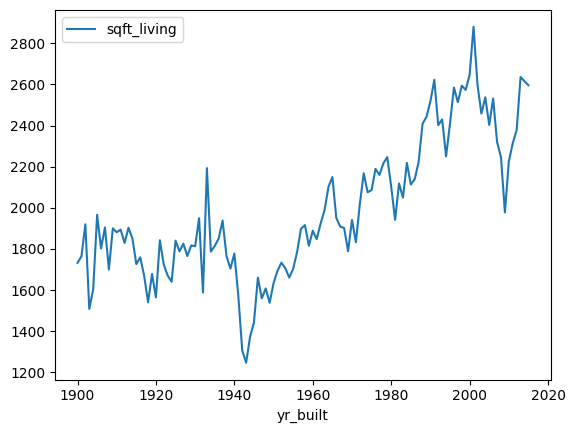

In [24]:
sns.lineplot(data[['sqft_living','yr_built']].groupby('yr_built').mean(), legend= ['area das salas'])

## 7 - Qual o tamanho mediano das salas dos imóveis por ano de construção?

<AxesSubplot: xlabel='yr_built'>

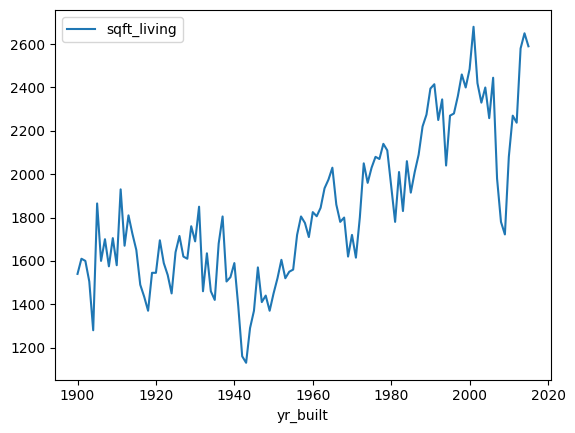

In [25]:
sns.lineplot(data[['sqft_living','yr_built']].groupby('yr_built').median())

## 8 - Qual o desvio-padrão do tamanho das salsa dos imóveis por ano de construção?


<AxesSubplot: xlabel='yr_built'>

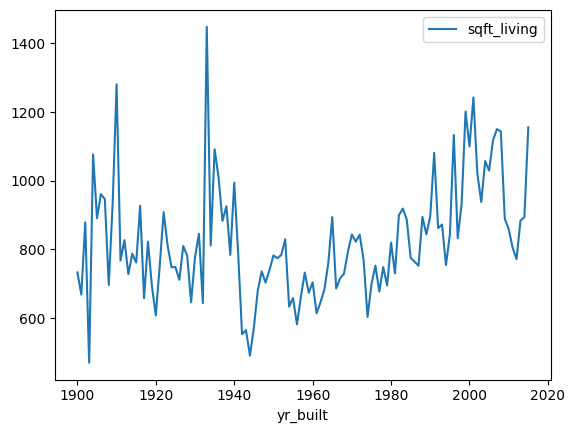

In [26]:
sns.lineplot(data[['sqft_living','yr_built']].groupby('yr_built').std())

## 9 - Como é o crescimento médio de preços de compras dos imóveis, por ano , por dia e pela semana do ano?

In [39]:
data['year'] = pd.to_datetime(data['date']).dt.year

In [52]:
by_year = data[['price','year']].groupby('year').sum().reset_index()

<AxesSubplot: xlabel='year', ylabel='price'>

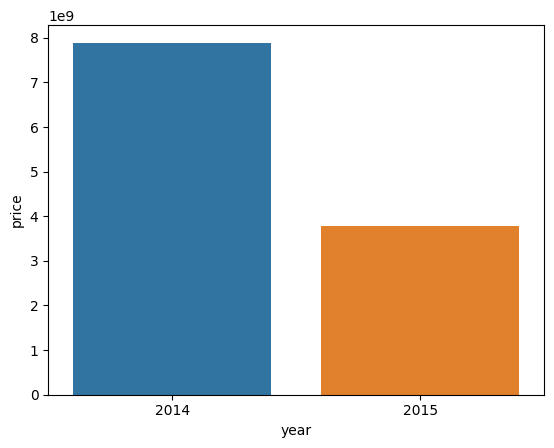

In [57]:
sns.barplot(data = by_year, 
            x = by_year['year'],
            y = by_year['price'])

In [ ]:
data[[]]